#빅데이터분석기사 실기 기출문제 9회 (예문사, 빅데이터분석기사 실기 한권완성)

In [ ]:
!git clone https://github.com/desunny/AnalyticsKnight/

fatal: destination path 'AnalyticsKnight' already exists and is not an empty directory.


In [2]:
data_path = "/content/AnalyticsKnight/datasets/Part5/ex9/"
#data_path = "/content/drive/MyDrive/01.Lecture/05.빅분기/02.빅분기실기/9회 기출풀이/datas/"


# 1유형

##1) 금융 거래 데이터 분석 문제
  

다음은 고객의 금융거래 데이터다. 다음 데이터를 이용하여 아래 문제에 답하시오.

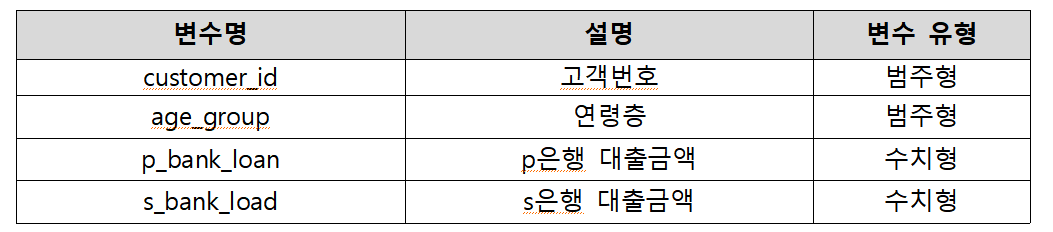

(1) 연령층(청년, 중년, 장년)에 따른 (P은행대출, S은행대출) 금액의 평균을 출력하시오.

(2) 각 연령층별 두 은행의 대출금액 차이(|P은행대출 - S은행대출|)를 구하고, 대출금액 차이가 가장 큰 연령층을 출력하시오.

(3) 대출금액 차이가 가장 큰 연령층에서 두 은행의 대출금액 차이가 가장 작은 고객의 고객번호를 출력하시오.

#### 811-01 데이터 로드

In [54]:
import pandas as pd

# 데이터 로드
data_file = data_path + "09.01.01.bank_loan.csv"
df = pd.read_csv(data_file)


#### 811-02 연령층별 은행 대출 금액 평균 출력

In [55]:
# (1) 연령층(청년, 중년, 장년)에 따른 (P은행대출, S은행대출) 금액의 평균을 출력하시오.
result1 = df.groupby('age_group')[['p_bank_loan', 's_bank_loan']].mean()

print("1번 답:")
print(result1)

1번 답:
           p_bank_loan  s_bank_loan
age_group                          
장년          536.437500   481.531250
중년          394.121212   360.333333
청년          246.514286   206.600000


#### 811-03 연령층별 두 은행의 대출금액의 차이가 가장 큰 연령층 출력

In [22]:
#(2) 각 연령층별 두 은행의 대출금액 차이(|P은행대출 - S은행대출|)를 구하고,
# 대출금액 차이가 가장 큰 연령층을 출력하시오.
df['대출차이'] = abs(df['p_bank_loan'] - df['s_bank_loan'])
age_group_diff = df.groupby('age_group')['대출차이'].mean()
max_diff_group = age_group_diff.idxmax()
result2 = max_diff_group

print(f"대출금액 차이가 가장 큰 연령층: {max_diff_group}")
print(f"해당 연령층의 평균 대출차이: {age_group_diff[max_diff_group]:,.0f}원")

print("\n2번 답:", result2)

대출금액 차이가 가장 큰 연령층: 장년
해당 연령층의 평균 대출차이: 55원

2번 답: 장년


#### 811-04 대출금액 차이가 가장 큰 연령층에서 대출금 차이가 가장 작은 고객 출력

In [23]:
#(3) 대출금액 차이가 가장 큰 연령층에서 두 은행의 대출금액 차이가 가장 작은 고객의 고객번호를 출력하시오.
target_group = df[df['age_group'] == max_diff_group]
min_diff_customer = target_group.loc[target_group['대출차이'].idxmin()]

print(f"고객번호: {min_diff_customer['customer_id']}")
print(f"대출차이: {min_diff_customer['대출차이']:,.0f}")

result3 = min_diff_customer['customer_id']

print("\n3번 답:", result3)


고객번호: A009
대출차이: 34

3번 답: A009


## 2) 범죄율 관련 문제

다음은 범죄에 대한 데이터다. 아래 데이터를 참조하여 문제에 답하시오.



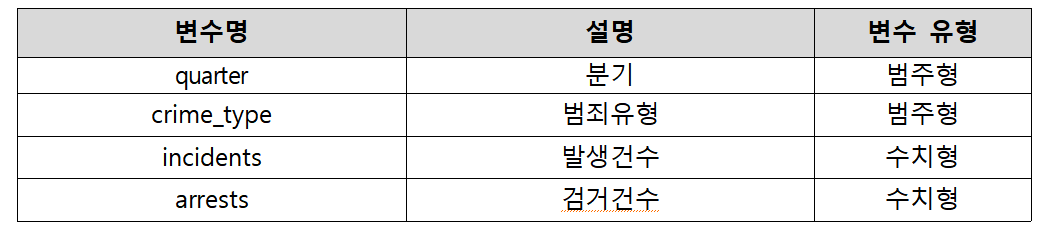

 (1) (분기, 범죄유형)별로 검거율을 구한 후, 가장 마지막 분기의 검거율이 가장 높은 범죄유형을 출력하시오. (검거율 = 검거건수/발생건수 * 100)
  
 (2) 1번에서 확인된 범죄유형의 검거건수 총합을 출력하시오.


#### 812-01 데이터 로드

In [56]:
import pandas as pd

# 데이터 로드
data_file = data_path + "09.01.02.crime.csv"
df = pd.read_csv(data_file)

#### 812-02 검거율이 가장 높은 범죄유형 찾기

In [28]:
# (1) (분기, 범죄유형)별로 검거율을 구한 후,
#     가장 마지막 분기의 검거율이 가장 높은 범죄유형을 출력하시오. (검거율 = 검거건수/발생건수 * 100)

# 검거율 구하기
df['검거율'] = (df['arrests'] / df['incidents']) * 100

# 마지막 쿼터 찾기
last_quarter = df['quarter'].max()

# 마지막 분기 데이터 가져오기
last_quarter_data = df[df['quarter'] == last_quarter]

# 검거율이 가장 높은 범죄유형 가져오기
highest_arrest_rate_crime = last_quarter_data.loc[last_quarter_data['검거율'].idxmax(), 'crime_type']

result1 = highest_arrest_rate_crime

print("\n1번 답:", result1)



1번 답: robbery


#### 812-03 검거율이 가장높은 범죄유형의 검거건수 총합 찾기

In [29]:
# (2) 1번에서 확인된 범죄유형의 검거건수 총합을 출력하시오.
result2 = df[df['crime_type'] == result1]['arrests'].sum()
print("\n2번 답:", result2)


2번 답: 926


## 3) 직원 관련 데이터

다음은 직원 관련 데이터다. 직원 데이터(employee_data.csv)의 결측값을 다음 조건에 따라 처리한 후, 아래 질문에 답하시오.
*   training_score의 결측값은 해당 부서의 중앙값으로 대체
*   years_of_service의 결측값은 성과등급별 근속연수의 평균값으로 대체                 (평균값 계산 시 소수점 이하 올림)




 (1) 연봉/근속연수(salary/years_of_service) 기준 상위 3번째 직원의 근속연수를 출력하시오.  

 (2) 연봉/교육점수(salary/training_score) 기준 상위 5번째 직원의 교육점수와 해당 직원의 부서를 출력하시오.

#### 813-01 데이터 로드

In [3]:
import pandas as pd

# 데이터 로드
data_file = data_path + "09.01.03.employees.csv"
df = pd.read_csv(data_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emp_id              100 non-null    object 
 1   department          100 non-null    object 
 2   years_of_service    80 non-null     float64
 3   salary              99 non-null     float64
 4   performance_rating  100 non-null    object 
 5   training_score      89 non-null     float64
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


#### 813-02 결측값 처리

In [46]:
# 데이터 결측값 처리
#training_score의 결측값은 해당 부서의 중앙값으로 대체
dept_median = df.groupby('department')['training_score'].median()
#print(dept_median)
#print('결측치 제거전:', df['training_score'].isnull().sum())
df['training_score'] = df['training_score'].fillna(df['department'].map(dept_median))
#print('결측치 제거후:', df['training_score'].isnull().sum())

#years_of_service의 결측값은 성과등급별 근속연수의 평균값으로 대체 (평균값 계산 시 소수점 이하 올림)
import numpy as np
rating_mean = df.groupby('performance_rating')['years_of_service'].mean().apply(np.ceil)
#print(rating_mean)
#print('결측치 제거전:', df['years_of_service'].isnull().sum())
df['years_of_service'] = df['years_of_service'].fillna(df['performance_rating'].map(rating_mean))
#print('결측치 제거후:', df['years_of_service'].isnull().sum())



performance_rating
A    7.0
B    5.0
C    5.0
Name: years_of_service, dtype: float64
결측치 제거전: 20
결측치 제거후: 0


#### 813-03 연봉/근속연수 기준 상위 3번째 직원의 근속연수 출력

In [47]:
# (1) 연봉/근속연수(salary/years_of_service) 기준 상위 3번째 직원의 근속연수를 출력하시오.

df['salary_per_year'] = df['salary'] / df['years_of_service']
# 연봉/근속연수 기준으로 정렬
df_sorted = df.sort_values('salary_per_year', ascending=False)

# 상위 3번째 직원의 근속연수
result = df_sorted.iloc[2]['years_of_service']
print("\n1번 답:", result)


1번 답: 3.0


#### 813-04 연봉/교육점수(salary/training_score) 기준 상위 5번째 직원의 교육점수와 해당 직원의 부서를 출력

In [48]:
# (2) 연봉/교육점수(salary/training_score) 기준 상위 5번째 직원의 교육점수와 해당 직원의 부서를 출력하시오.

df['salary_per_training_score'] = df['salary'] / df['training_score']
# 연봉/교육점수 기준으로 정렬
df_sorted = df.sort_values('salary_per_training_score', ascending=False)

# 상위 5번째 직원의 교육점수와 부서
training_score = df_sorted.iloc[4]['training_score']
department = df_sorted.iloc[4]['department']

print("\n2번 답: 교육점수 =", training_score, ", 부서 =", department)


2번 답: 교육점수 = 92.0 , 부서 = IT


# 2유형

1) 고객의 신용등급에 따라서 대출 실행 여부 및 이자율을 차등 적용할 계획이다. 주어진 훈련 데이터 세트를 활용하여 고객의 신용등급(credit_rating)을 분류하는 모델을 구축한 후 테스트 데이터를 대상으로 분류 결과를 CSV 파일로 제출하시오. (채점 기준 – macro-f1 score)


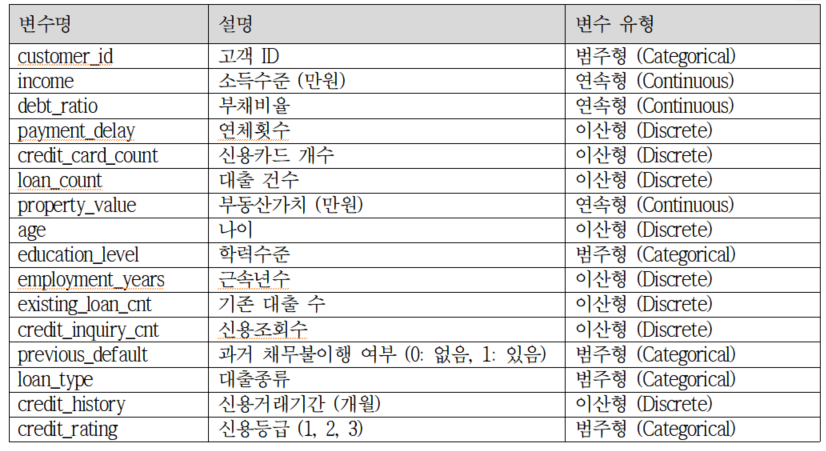

#### 821-01 데이터 로드

In [61]:
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd

train_file = data_path + '09.02.train.csv'
test_x_file = data_path + '09.02.test_x.csv'

train_df = pd.read_csv(train_file)
test_x_df = pd.read_csv(test_x_file)

# 사용자 코딩




# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'index': X_test.index, 'y_pred': pred}).to_csv('003000000.csv', index=False)

#### 821-02 라이브러리 임포트

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

#### 821-03 데이터 정보 확인

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         700 non-null    int64  
 1   income              700 non-null    int64  
 2   debt_ratio          700 non-null    float64
 3   payment_delay       700 non-null    int64  
 4   credit_card_count   700 non-null    int64  
 5   loan_count          700 non-null    int64  
 6   property_value      700 non-null    int64  
 7   age                 700 non-null    int64  
 8   education_level     700 non-null    object 
 9   employment_years    700 non-null    int64  
 10  existing_loan_cnt   700 non-null    int64  
 11  credit_inquiry_cnt  700 non-null    int64  
 12  previous_default    700 non-null    int64  
 13  loan_type           700 non-null    object 
 14  credit_history      700 non-null    int64  
 15  credit_rating       700 non-null    int64  
dtypes: float

In [65]:
train_df.describe()

,customer_id,income,debt_ratio,payment_delay,credit_card_count,loan_count,property_value,age,employment_years,existing_loan_cnt,credit_inquiry_cnt,previous_default,credit_history,credit_rating
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1350.50000,4987.274286,0.352829,1.027143,2.005714,1.502857,39229.578571,41.514286,9.358571,1.461429,3.361429,0.228571,32.655714,2.001429
std,202.21688,1478.429521,0.146092,1.012429,1.409135,1.117550,19915.519127,9.744729,5.677680,1.125818,2.310503,0.420213,15.136859,0.817371
min,1001.00000,138.000000,0.100000,0.000000,0.000000,0.000000,-26790.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1175.75000,3957.500000,0.220000,0.000000,1.000000,1.000000,24483.250000,34.000000,5.000000,0.000000,1.000000,0.000000,19.000000,1.000000
50%,1350.50000,4997.500000,0.360000,1.000000,2.000000,2.000000,39203.000000,41.000000,9.000000,1.000000,3.000000,0.000000,33.000000,2.000000
75%,1525.25000,5949.250000,0.480000,2.000000,3.000000,2.250000,54128.250000,50.000000,14.000000,2.000000,5.000000,0.000000,46.000000,3.000000
max,1700.00000,10779.000000,0.600000,6.000000,4.000000,3.000000,98415.000000,59.000000,19.000000,3.000000,7.000000,1.000000,59.000000,3.000000


#### 821-04 결측치 확인 및 처리

In [67]:
# 결측치 처리 및 확인
print("결측치 확인")
print("Train:", train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("Test:", test_x_df.isnull().sum()[test_x_df.isnull().sum() > 0])

결측치 확인
Train: Series([], dtype: int64)
Test: Series([], dtype: int64)


#### 821-05 라벨인코딩

In [69]:
# 범주형 변수 전처리 Label Encoding
le = LabelEncoder()
cat_cols = ['education_level', 'loan_type']

for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_x_df[col] = le.transform(test_x_df[col])

#### 821-06 피처(변수) 지정

In [72]:
# 모든 피처 지정
feature_cols = ['income', 'debt_ratio', 'payment_delay', 'credit_card_count', 'loan_count',
               'property_value', 'age', 'education_level', 'employment_years',
               'existing_loan_cnt', 'credit_inquiry_cnt', 'previous_default',
               'loan_type', 'credit_history']

#### 821-07 학습데이터 분리

In [75]:
# 학습 데이터를 train과 validation으로 분리 (7:3 비율)
X_train, X_val, y_train, y_val = train_test_split(
    train_df[feature_cols],
    train_df['credit_rating'],
    test_size=0.3,
    random_state=42
)

#### 821-08 스케일링

In [76]:
# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_x_scaled = scaler.transform(test_x_df[feature_cols])

#### 821-09 첫번째(초기) 모델 학습

In [77]:
# 첫 번째 모델 학습
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### 821-10 검증 데이터로 성능 확인

In [78]:
# validation 데이터로 성능 확인
val_pred = rf1.predict(X_val)
val_f1 = f1_score(y_val, val_pred, average='macro')
print(f'\nValidation Macro-F1 Score: {val_f1:.3f}')


Validation Macro-F1 Score: 0.770


#### 821-11 특성(피처)의 중요도 확인

In [79]:
# 특성 중요도 확인
importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf1.feature_importances_
})
importance = importance.sort_values('importance', ascending=False)
print('\n특성 중요도')
print(importance)



특성 중요도
               feature  importance
0               income    0.276762
11    previous_default    0.177953
13      credit_history    0.104054
1           debt_ratio    0.088470
5       property_value    0.062140
6                  age    0.052124
2        payment_delay    0.046795
8     employment_years    0.044437
10  credit_inquiry_cnt    0.038153
3    credit_card_count    0.027139
9    existing_loan_cnt    0.023386
4           loan_count    0.020574
12           loan_type    0.019835
7      education_level    0.018177


#### 821-12 상위 8개 특성 선택

In [80]:
# 상위 8개 특성 선택
selected_features = importance['feature'].head(8).tolist()
print('\n선택된 특성:', selected_features)



선택된 특성: ['income', 'previous_default', 'credit_history', 'debt_ratio', 'property_value', 'age', 'payment_delay', 'employment_years']


#### 821-13 최종 모델 학습

In [81]:
# 선택된 특성으로 최종 모델 학습
X_train_selected = X_train[:, [feature_cols.index(feat) for feat in selected_features]]
X_val_selected = X_val[:, [feature_cols.index(feat) for feat in selected_features]]
test_x_selected = test_x_scaled[:, [feature_cols.index(feat) for feat in selected_features]]

rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_selected, y_train)


RandomForestClassifier(random_state=42)

#### 821-14 최종 모델 성능 확인

In [82]:
# validation 성능 확인
val_pred_final = rf_final.predict(X_val_selected)
val_f1_final = f1_score(y_val, val_pred_final, average='macro')
print(f'\n최종 모델 Validation Macro-F1 Score: {val_f1_final:.3f}')


최종 모델 Validation Macro-F1 Score: 0.834


#### 821-15 답안 제출

In [86]:
# 답안 제출

y_pred = rf_final.predict(test_x_selected)

# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
pd.DataFrame({'index': range(len(test_x_selected)), 'y_pred': y_pred}).to_csv('003000000.csv', index=False)

#### 821-16 답안 채점

In [87]:

test_y_file = data_path + '09.02.test_y.csv'
test_y_df = pd.read_csv(test_y_file)

test_f1_score = f1_score(test_y_df['credit_rating'], y_pred, average='macro')
print(f'최종 모델 Test Macro-F1 Score: {test_f1_score:.3f}')


최종 모델 Test Macro-F1 Score: 0.779


# 3유형

## 1) 다중회귀 분석 문제

주택가격 데이터(house_price.csv)를 이용하여 다중회귀분석을 수행하고 다음 물음에 답하시오. (종속변수는 price임)

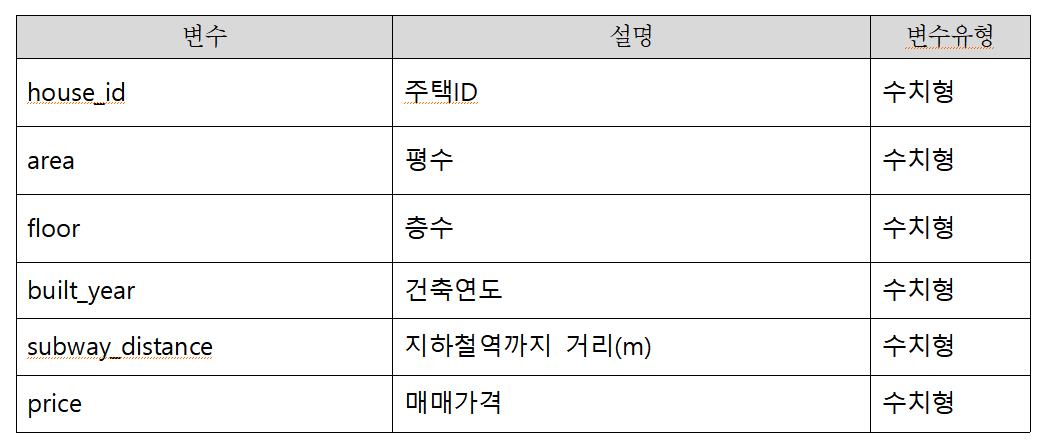

(1) 다중회귀분석을 수행하고, 모형의 F-통계량과 유의확률을 구하시오.

#### 831-01. 다중회귀 분석 수행

In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 데이터 읽기
data_file = data_path + '09.03.01.house_price.csv'
df = pd.read_csv(data_file)

# 독립변수와 종속변수 분리
X = df[['area', 'floor', 'built_year', 'subway_distance']]
y = df['price']

# 1번: F-통계량과 유의확률
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
f_statistic = model.fvalue
f_pvalue = model.f_pvalue

print("1번 답:")
print(f"F-통계량: {f_statistic:.4f}")
print(f"유의확률: {f_pvalue:.4f}")


1번 답:
F-통계량: 8117.8225
유의확률: 0.0000


(2) 유의수준 0.05 기준으로 유의한 독립변수의 개수를 구하시오.

#### 831-02 유의한 독립변수 개수 구하기

In [91]:
# 2번: 유의한 독립변수 개수
significant_vars = sum(model.pvalues[1:] < 0.05)  # constant 제외
print(f"\n2번 답:")
print(f"유의한 독립변수 개수: {significant_vars}개")


2번 답:
유의한 독립변수 개수: 3개


(3) 결정계수(R-squared)가 가장 높은 독립변수 2개의 조합을 구하시오.

#### 831-03 결정계수가 가장 높은 독립변수 2개 조합 구하기

In [93]:
from itertools import combinations

# 3번: 가장 높은 R-squared를 가진 변수 2개 조합
features = ['area', 'floor', 'built_year', 'subway_distance']
best_r2 = 0
best_combo = None

for combo in combinations(features, 2):
    X_subset = df[list(combo)]
    X_subset = sm.add_constant(X_subset)
    model_subset = sm.OLS(y, X_subset).fit()
    if model_subset.rsquared > best_r2:
        best_r2 = model_subset.rsquared
        best_combo = combo

print(f"\n3번 답:")
print(f"변수 조합: {best_combo}")
print(f"R-squared: {best_r2:.4f}")


3번 답:
변수 조합: ('area', 'floor')
R-squared: 0.9871


##2) 로지스틱회귀분석 문제

다음은 보험 청구 데이터다. 이 데이터를 이용하여 로지스틱 회귀분석을 수행하시오. (종속변수는 보험청구여부임)

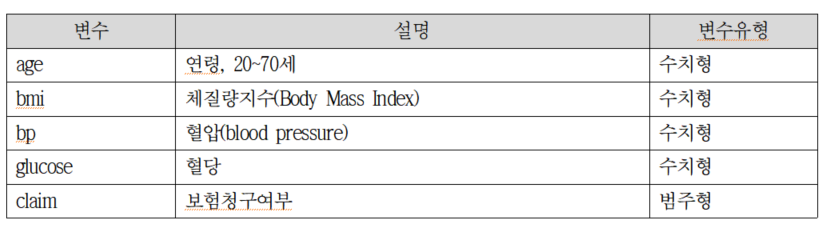

(1)로지스틱 회귀분석을 수행하고, 모형의 카이제곱 통계량과 유의확률을 구하시오.

#### 832-01 로지스틱 회귀 모형 카이제곱 통계량과 유의확률 구하기

In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 데이터 읽기
data_file = data_path + '09.03.02.insurance_claim.csv'
df = pd.read_csv(data_file)


# 독립변수와 종속변수 분리
X = df[['age', 'bmi', 'bp', 'glucose']]
y = df['claim']

# 독립변수에 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀분석 수행
model = sm.Logit(y, X).fit()

# 1번: 카이제곱 통계량과 유의확률
chi2_statistic = model.llr
chi2_pvalue = model.llr_pvalue

print("1번 답:")
print(f"카이제곱 통계량: {chi2_statistic:.4f}")
print(f"유의확률: {chi2_pvalue:.4f}")

Optimization terminated successfully.
         Current function value: 0.571099
         Iterations 6
1번 답:
카이제곱 통계량: 72.5754
유의확률: 0.0000


(2)유의수준 0.05 기준으로 유의한 독립변수의 개수를 구하시오.

#### 832-02 유의한 독립변수 개수 구하기

In [96]:
# 2번: 유의한 독립변수 개수
significant_vars = sum(model.pvalues[1:] < 0.05)  # constant 제외
print(f"\n2번 답:")
print(f"유의한 독립변수 개수: {significant_vars}개")


2번 답:
유의한 독립변수 개수: 3개


(3)혈압(bp)과 혈당(glucose)이 증가할 때의 오즈비(odds ratio)를 구하시오.

#### 832-03 혈압과 혈당 증가시 오즈비 구하기

In [97]:
# 3번: 혈압과 혈당의 오즈비
odds_ratios = np.exp(model.params)
print(f"\n3번 답:")
print(f"혈압(bp)의 오즈비: {odds_ratios['bp']:.4f}")
print(f"혈당(glucose)의 오즈비: {odds_ratios['glucose']:.4f}")

#오즈비 > 1: 해당 변수가 증가하면 보험청구 확률 증가
#오즈비 < 1: 해당 변수가 증가하면 보험청구 확률 감소
#예: 혈압의 오즈비가 1.04라면, 혈압이 1단위 증가할 때 보험청구 확률이 4% 증가


3번 답:
혈압(bp)의 오즈비: 1.0569
혈당(glucose)의 오즈비: 1.0154
